# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Arknights_1.csv")
df.head()

,userName,score,at,content
0,M VikrisquerpantsMLA,1,2024-05-17 22:30:53,download data yang berulang.kuota dah habis 10...
1,Handy Salim,3,2024-05-17 14:24:25,sudah 4 tahun berlalu sejak saya memainkan gam...
2,Alifian Pradana,5,2024-05-17 12:08:46,"Gameplay Base Defense yang menarik juga, chibi..."
3,Emu Roum,5,2024-05-17 05:44:18,Bisakah di tambahkan bahasa Indonesia??
4,Janu Adi Pratama Janu,5,2024-05-17 04:03:02,Please support Indonesia lenguage because many...


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,download data yang berulang.kuota dah habis 10...,M VikrisquerpantsMLA,2024-05-17 22:30:53
1,sudah 4 tahun berlalu sejak saya memainkan gam...,Handy Salim,2024-05-17 14:24:25
2,"Gameplay Base Defense yang menarik juga, chibi...",Alifian Pradana,2024-05-17 12:08:46
3,Bisakah di tambahkan bahasa Indonesia??,Emu Roum,2024-05-17 05:44:18
4,Please support Indonesia lenguage because many...,Janu Adi Pratama Janu,2024-05-17 04:03:02
...,...,...,...
1786,Bagus,Bintang 2312,2022-12-28 03:01:16
1787,Lumayan bagus nih game dari segi grafis dan ga...,Muhammad Amad,2022-12-28 02:34:31
1788,Tolong untuk developer arknight Kurangi ukuran...,3Y MET4L,2022-12-28 01:48:18
1789,Game nya bagus,6. NUR MUHAMMAD ISKANDAR ESQI,2022-12-28 00:38:38


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1791 non-null   object
 1   userName  1791 non-null   object
 2   at        1791 non-null   object
dtypes: object(3)
memory usage: 42.1+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,1791,1791,1791
unique,1674,1785,1790
top,Bagus,Achmad,2023-07-13 21:44:25
freq,13,2,2


# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(1791, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(1674, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,download data yang berulangkuota dah habis gb...,M VikrisquerpantsMLA,2024-05-17 22:30:53
1,sudah tahun berlalu sejak saya memainkan game...,Handy Salim,2024-05-17 14:24:25
2,gameplay base defense yang menarik juga chibi ...,Alifian Pradana,2024-05-17 12:08:46
3,bisakah di tambahkan bahasa indonesia,Emu Roum,2024-05-17 05:44:18
4,please support indonesia lenguage because many...,Janu Adi Pratama Janu,2024-05-17 04:03:02
...,...,...,...
1784,why after cc and update i got reconc in the mi...,GunTher Dimas,2022-12-28 03:33:01
1785,story,Zemedik,2022-12-28 03:25:21
1787,lumayan bagus nih game dari segi grafis dan ga...,Muhammad Amad,2022-12-28 02:34:31
1788,tolong untuk developer arknight kurangi ukuran...,3Y MET4L,2022-12-28 01:48:18


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,download data yang berulangkuota dah habis gb...,M VikrisquerpantsMLA,2024-05-17 22:30:53
1,sudah tahun berlalu sejak saya memainkan game...,Handy Salim,2024-05-17 14:24:25
2,gameplay base defense yang menarik juga chibi ...,Alifian Pradana,2024-05-17 12:08:46
3,bisakah di tambahkan bahasa indonesia,Emu Roum,2024-05-17 05:44:18
4,please support indonesia lenguage because many...,Janu Adi Pratama Janu,2024-05-17 04:03:02
...,...,...,...
1784,why after cc and update i got reconc in the mi...,GunTher Dimas,2022-12-28 03:33:01
1785,story,Zemedik,2022-12-28 03:25:21
1787,lumayan bagus nih game dari segi grafis dan ga...,Muhammad Amad,2022-12-28 02:34:31
1788,tolong untuk developer arknight kurangi ukuran...,3Y MET4L,2022-12-28 01:48:18


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,download data berulangkuota dah habis gb aj b...,M VikrisquerpantsMLA,2024-05-17 22:30:53
1,tahun berlalu sejak memainkan game sangat men...,Handy Salim,2024-05-17 14:24:25
2,gameplay base defense menarik chibi memiliki s...,Alifian Pradana,2024-05-17 12:08:46
3,bisakah tambahkan bahasa indonesia,Emu Roum,2024-05-17 05:44:18
4,please support indonesia lenguage because many...,Janu Adi Pratama Janu,2024-05-17 04:03:02
...,...,...,...
1784,why after cc and update i got reconc in the mi...,GunTher Dimas,2022-12-28 03:33:01
1785,story,Zemedik,2022-12-28 03:25:21
1787,lumayan bagus nih game segi grafis gameplay,Muhammad Amad,2022-12-28 02:34:31
1788,untuk developer arknight kurangi ukuran ukuran...,3Y MET4L,2022-12-28 01:48:18


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0       [download, data, berulangkuota, dah, habis, gb...
1       [tahun, berlalu, sejak, memainkan, game, sanga...
2       [gameplay, base, defense, menarik, chibi, memi...
3                 [bisakah, tambahkan, bahasa, indonesia]
4       [please, support, indonesia, lenguage, because...
                              ...                        
1784    [why, after, cc, and, update, i, got, reconc, ...
1785                                              [story]
1787    [lumayan, bagus, nih, game, segi, grafis, game...
1788    [untuk, developer, arknight, kurangi, ukuran, ...
1790                                        [mantap, sih]
Name: content, Length: 1674, dtype: object

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Arknights_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Arknights_1.csv', encoding = 'latin1')
df_clean

,content
0,download data berulangkuota dah habis gb aj bl...
1,tahun lalu sejak main game sangat senang main ...
2,gameplay base defense tarik chibi milik skill ...
3,bisa tambah bahasa indonesia
4,please support indonesia lenguage because many...
...,...
1669,why after cc and update i got reconc in the mi...
1670,story
1671,lumayan bagus nih game segi grafis gameplay
1672,untuk developer arknight kurang ukur ukur size...


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Arknights_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Arknights_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Arknights_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,download data berulangkuota dah habis gb aj bl...,download repeated data gb aj blom rehadehh
1,1,tahun lalu sejak main game sangat senang main ...,"Last year since playing games, it's been a ple..."
2,2,gameplay base defense tarik chibi milik skill ...,"fontcolor="" # FFFF00""gameplaybasedefense pull ..."
3,3,bisa tambah bahasa indonesia,Can you add English to that?
4,4,please support indonesia lenguage because many...,Please support Indonesian language because man...
...,...,...,...
1669,1669,why after cc and update i got reconc in the mi...,why after cc and update i got reconc in the mi...
1670,1670,story,story
1671,1671,lumayan bagus nih game segi grafis gameplay,It's not bad. It's a graphical game game game ...
1672,1672,untuk developer arknight kurang ukur ukur size...,For the developer overnight lacks the size mea...


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Arknights_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,download data berulangkuota dah habis gb aj bl...,download repeated data gb aj blom rehadehh
1,1,tahun lalu sejak main game sangat senang main ...,"Last year since playing games, it's been a ple..."
2,2,gameplay base defense tarik chibi milik skill ...,"fontcolor="" # FFFF00""gameplaybasedefense pull ..."
3,3,bisa tambah bahasa indonesia,Can you add English to that?
4,4,please support indonesia lenguage because many...,Please support Indonesian language because man...
...,...,...,...
1669,1669,why after cc and update i got reconc in the mi...,why after cc and update i got reconc in the mi...
1670,1670,story,story
1671,1671,lumayan bagus nih game segi grafis gameplay,It's not bad. It's a graphical game game game ...
1672,1672,untuk developer arknight kurang ukur ukur size...,For the developer overnight lacks the size mea...


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 761
Netral = 539
Negatif = 374

Total Data Seluruhnya : 1674


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,download data berulangkuota dah habis gb aj bl...,download repeated data gb aj blom rehadehh,Netral
1,1,tahun lalu sejak main game sangat senang main ...,"Last year since playing games, it's been a ple...",Positif
2,2,gameplay base defense tarik chibi milik skill ...,"fontcolor="" # FFFF00""gameplaybasedefense pull ...",Netral
3,3,bisa tambah bahasa indonesia,Can you add English to that?,Netral
4,4,please support indonesia lenguage because many...,Please support Indonesian language because man...,Positif
...,...,...,...,...
1669,1669,why after cc and update i got reconc in the mi...,why after cc and update i got reconc in the mi...,Netral
1670,1670,story,story,Netral
1671,1671,lumayan bagus nih game segi grafis gameplay,It's not bad. It's a graphical game game game ...,Negatif
1672,1672,untuk developer arknight kurang ukur ukur size...,For the developer overnight lacks the size mea...,Negatif


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,download data berulangkuota dah habis gb aj bl...,download repeated data gb aj blom rehadehh,Netral
1,tahun lalu sejak main game sangat senang main ...,"Last year since playing games, it's been a ple...",Positif
2,gameplay base defense tarik chibi milik skill ...,"fontcolor="" # FFFF00""gameplaybasedefense pull ...",Netral
3,bisa tambah bahasa indonesia,Can you add English to that?,Netral
4,please support indonesia lenguage because many...,Please support Indonesian language because man...,Positif
...,...,...,...
1669,why after cc and update i got reconc in the mi...,why after cc and update i got reconc in the mi...,Netral
1670,story,story,Netral
1671,lumayan bagus nih game segi grafis gameplay,It's not bad. It's a graphical game game game ...,Negatif
1672,untuk developer arknight kurang ukur ukur size...,For the developer overnight lacks the size mea...,Negatif


# **Visualisasi**


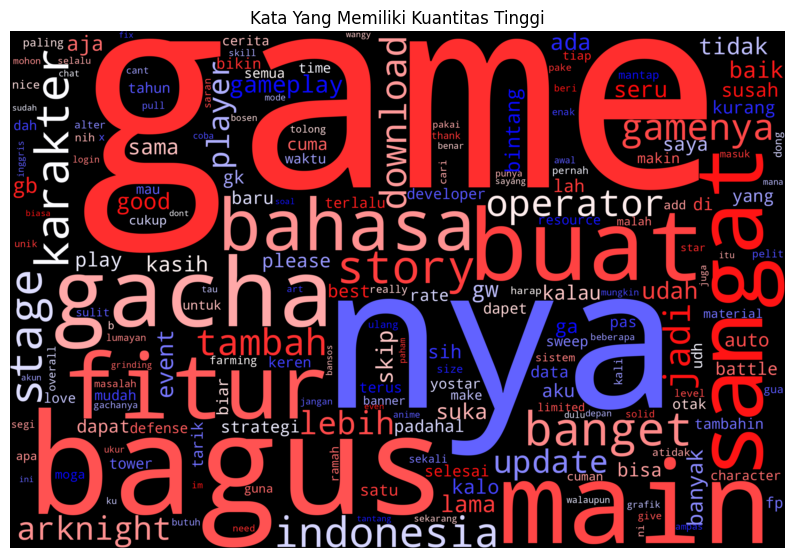

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


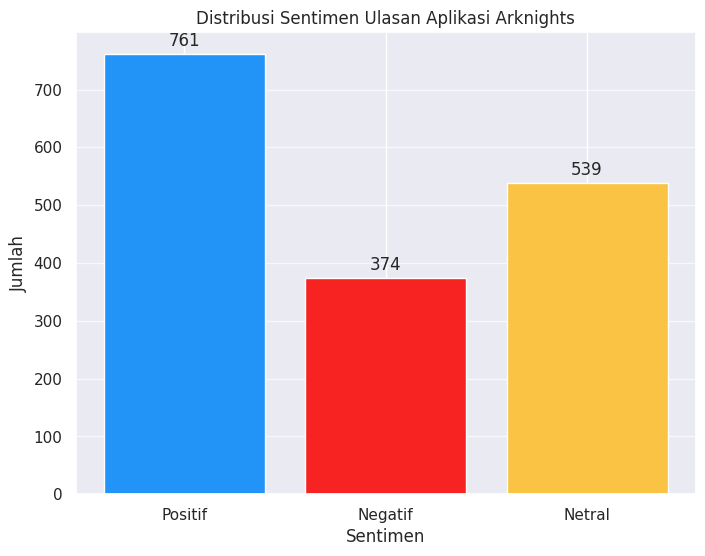

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Arknights")


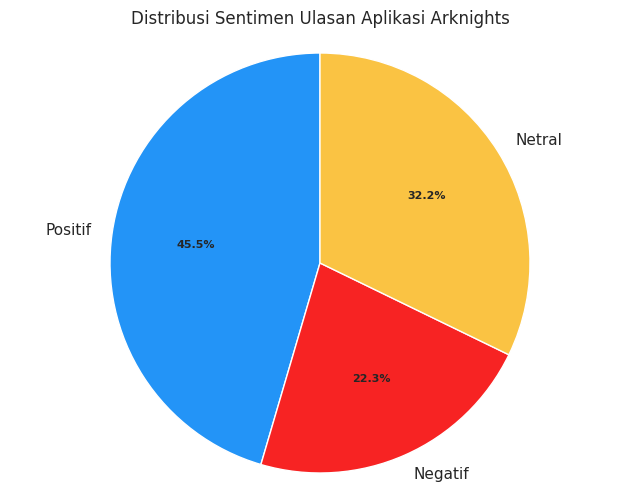

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Arknights")

In [38]:
data = data.replace({'Positif':0, 'Netral':1, 'Negatif':2})
data

,content,content_en,sentimen
0,download data berulangkuota dah habis gb aj bl...,download repeated data gb aj blom rehadehh,1
1,tahun lalu sejak main game sangat senang main ...,"Last year since playing games, it's been a ple...",0
2,gameplay base defense tarik chibi milik skill ...,"fontcolor="" # FFFF00""gameplaybasedefense pull ...",1
3,bisa tambah bahasa indonesia,Can you add English to that?,1
4,please support indonesia lenguage because many...,Please support Indonesian language because man...,0
...,...,...,...
1669,why after cc and update i got reconc in the mi...,why after cc and update i got reconc in the mi...,1
1670,story,story,1
1671,lumayan bagus nih game segi grafis gameplay,It's not bad. It's a graphical game game game ...,2
1672,untuk developer arknight kurang ukur ukur size...,For the developer overnight lacks the size mea...,2


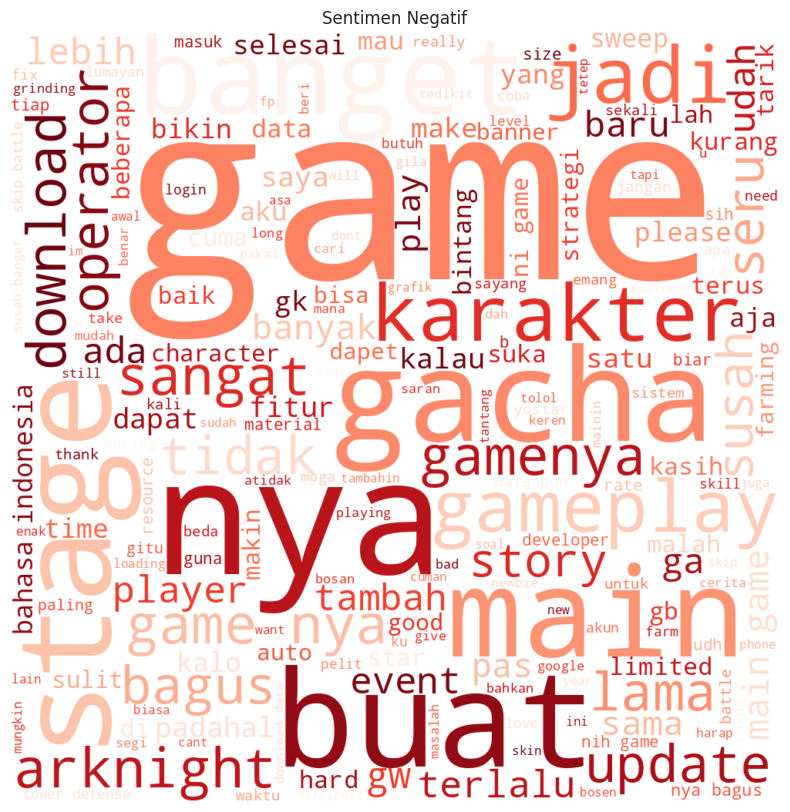

In [39]:
# Visualisasi Wordcould Positif, Negatif, dan Netral

data_positif = data[data['sentimen'] == 0]
data_netral = data[data['sentimen'] == 1]
data_negatif = data[data['sentimen'] == 2]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

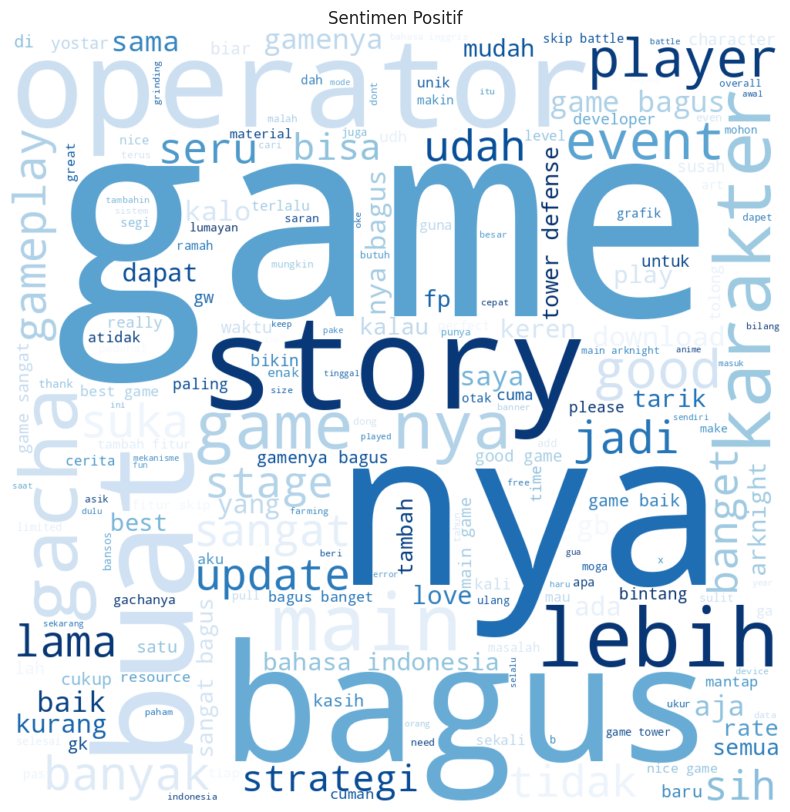

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

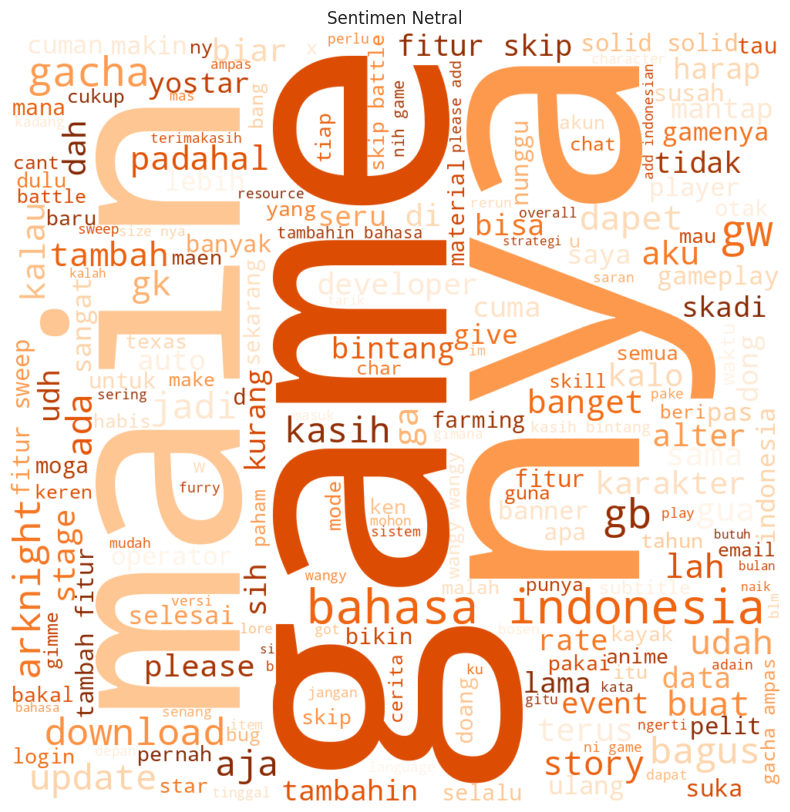

In [41]:
all_words = ' '.join([reviews for reviews in data_netral['content']])
wordcloud = WordCloud(colormap='Oranges', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Netral")
plt.margins(x=0, y=0)
plt.show()

In [42]:
# Menghitung Jumlah Sentimen Positif, Netral, Negatif
data['sentimen'].value_counts()

sentimen
0    761
1    539
2    374
Name: count, dtype: int64

# **Data Preparation**

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [46]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

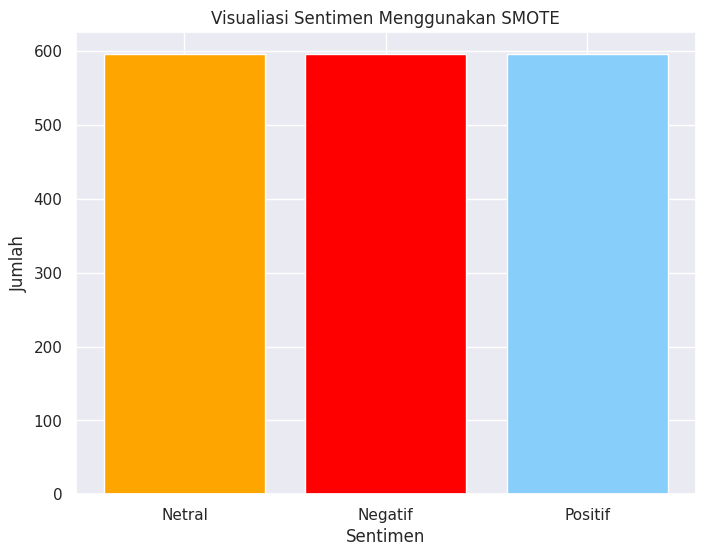

In [47]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue', 'orange'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif', 'Netral'])
plt.show()

# **Modeling**


In [48]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [49]:
y_pred = naive_bayes.predict(X_test_vec)

In [50]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif', 'Netral'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.6059701492537314

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.68      0.75      0.71       165
     Positif       0.61      0.46      0.53        97
      Netral       0.44      0.48      0.46        73

    accuracy                           0.61       335
   macro avg       0.58      0.56      0.57       335
weighted avg       0.61      0.61      0.60       335



In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[123  22  20]
 [ 28  45  24]
 [ 31   7  35]]

Accuracy =  0.6059701492537314


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

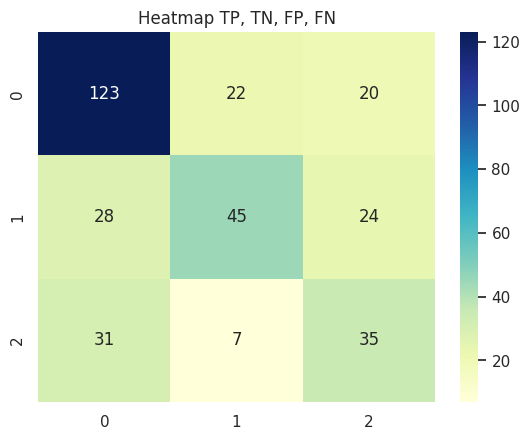

In [52]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1', '2'],
                         index=['0', '1', '2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [53]:
# Slicing the confusion matrix
print('\nTrue Positives (TP):', cm[0, 0])
print('False Negatives (FN) for Positive class:', cm[0, 1] + cm[0, 2])
print('False Positives (FP) for Positive class:', cm[1, 0] + cm[2, 0])
print('True Negatives (TN) for Negative class:', cm[1, 1])
print('False Negatives (FN) for Negative class:', cm[1, 2])
print('False Positives (FP) for Negative class:', cm[2, 1])
print('True Negatives (TN) for Neutral class:', cm[2, 2])


True Positives (TP): 123
False Negatives (FN) for Positive class: 42
False Positives (FP) for Positive class: 59
True Negatives (TN) for Negative class: 45
False Negatives (FN) for Negative class: 24
False Positives (FP) for Negative class: 7
True Negatives (TN) for Neutral class: 35


In [54]:
tp = cm[0, 0]
fn_pos = cm[0, 1] + cm[0, 2]
fp_pos = cm[1, 0] + cm[2, 0]
tn_neg = cm[1, 1]
fn_neg = cm[1, 2]
fp_neg = cm[2, 1]
tn_neu = cm[2, 2]

In [55]:
total = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
correct = tp + tn_neg + tn_neu

In [56]:
# Calculate classification Accuracy
total = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
correct = tp + tn_neg + tn_neu

classification_accuracy = correct / total
print(f'\nClassification Accuracy: {classification_accuracy:.4f}')


Classification Accuracy: 0.6060


In [57]:
# Calculate Classification Error
total_instances = tp + fn_pos + fp_pos + tn_neg + fn_neg + fp_neg + tn_neu
misclassified_instances = fn_pos + fp_pos + fn_neg + fp_neg

classification_error = misclassified_instances / total_instances
print(f'\nClassification Error: {classification_error:.4f}')


Classification Error: 0.3940


# **Testing**


In [64]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : storynya bagus
Hasil Analisis Sentimen Untuk Teks Baru : Positif


In [63]:
stnew_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : jelek, gachanya susah
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [62]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 1:
    sentimen_label = "Netral"
else:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : Tambahin fitur sweep
Hasil Analisis Sentimen Untuk Teks Baru : Netral
